In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('C://Edtech_data analysis'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C://Edtech_data analysis\leads_basic_details.csv
C://Edtech_data analysis\leads_demo_watched_details.csv
C://Edtech_data analysis\leads_interaction_details.csv
C://Edtech_data analysis\leads_reasons_for_no_interest.csv
C://Edtech_data analysis\sales_managers_assigned_leads_details.csv
C://Edtech_data analysis\Untitled.ipynb
C://Edtech_data analysis\.ipynb_checkpoints\Untitled-checkpoint.ipynb


In [2]:
leads_basic_details = pd.read_csv("C://Edtech_data analysis//leads_basic_details.csv")
leads_demo_watched_details = pd.read_csv("C://Edtech_data analysis//leads_demo_watched_details.csv")
leads_interaction_details = pd.read_csv("C://Edtech_data analysis//leads_interaction_details.csv")
leads_reasons_for_no_interest = pd.read_csv("C://Edtech_data analysis//leads_reasons_for_no_interest.csv")
sales_managers_assigned_leads_details = pd.read_csv("C://Edtech_data analysis//sales_managers_assigned_leads_details.csv")

In [3]:
leads_basic_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


# obervation

In [4]:
leads_basic_details.query('lead_id == ("USR1138", "USR1213")')

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
137,USR1138,22,MALE,Hyderabad,Looking for Job,Government Employee,social_media
212,USR1213,21,FEMALE,Hyderabad,Degree,Lawyer,SEO


In [5]:
leads_basic_details.age.unique()

array([ 16,  20,  21,  22,  25,  18,  24, 211, 116], dtype=int64)

### Assuming target audience age between 15-35, we will exclude the above entries

In [6]:
lead_basic_details_cleaned = leads_basic_details.query('age <= 35')

In [7]:
lead_basic_details_cleaned.lead_gen_source.unique()

array(['social_media', 'user_referrals', 'website', 'SEO',
       'email_marketing'], dtype=object)

Text(0.5, 1.0, 'Lead Source')

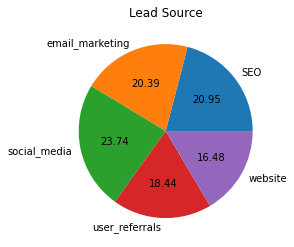

In [8]:
# plot a pie chart
ax = lead_basic_details_cleaned.groupby('lead_gen_source').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Lead Source")

#### Preliminary observation tells that approx. 24% of the leads came to know about the firm through social media. SEO and email marketing form the next important source, each contributing about 20% of the leads.

In [9]:
leads_demo_watched_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [10]:
leads_demo_watched_details.query('watched_percentage > 100')

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


#### Watched Percentage cannot exceed 100, therefore we will need to exclude below results from our analysis

In [11]:
leads_demo_watched_details_cleaned = leads_demo_watched_details.query('watched_percentage <= 100')

In [12]:
# merge leads file with demo file
df_merged_leads_demo = pd.merge(leads_demo_watched_details_cleaned, lead_basic_details_cleaned, how='inner', on = 'lead_id')

#df_merged_leads_demo.to_csv('merged_leads_demo.csv', na_rep=' ', index=False)


Text(0.5, 1.0, 'Demo Language')

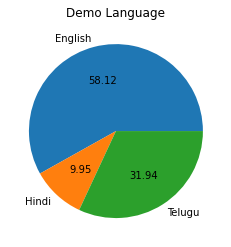

In [13]:
# plot a pie chart
ax = df_merged_leads_demo.groupby('language').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Demo Language")

#### Almost 60% of the leads watched demo in English, 30% in Telugu, and just about 10% in Hindi.

In [14]:
leads_in_cities = df_merged_leads_demo.groupby('current_city').size()

Text(0, 0.5, 'Lead Count')

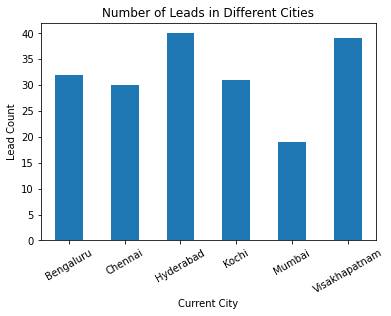

In [15]:
from matplotlib import pyplot as plt

leads_in_cities.plot(kind="bar")
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Number of Leads in Different Cities")
plt.xlabel("Current City")
plt.ylabel("Lead Count")

#### Number of leads from Mumbai are the least.

In [16]:
df_merged_leads_demo.groupby(['language', 'current_city']).size()

language  current_city 
English   Bengaluru        22
          Chennai          17
          Hyderabad        20
          Kochi            19
          Mumbai           11
          Visakhapatnam    22
Hindi     Bengaluru         3
          Chennai           6
          Hyderabad         3
          Kochi             4
          Mumbai            1
          Visakhapatnam     2
Telugu    Bengaluru         7
          Chennai           7
          Hyderabad        17
          Kochi             8
          Mumbai            7
          Visakhapatnam    15
dtype: int64

In [17]:
# merge demo file with interaction file

df_merged_interaction_demo = pd.merge(leads_demo_watched_details_cleaned, leads_interaction_details, how='inner', on = 'lead_id')

#df_merged_interaction_demo.to_csv('merged_interaction_demo.csv', na_rep=' ', index=False)

In [18]:
df_merged_interaction_demo.head(10)

,lead_id,demo_watched_date,language,watched_percentage,jnr_sm_id,lead_stage,call_done_date,call_status,call_reason
0,USR1002,1/4/2022,Telugu,42,JNR1001MG,lead,1/3/2022,successful,lead_introduction
1,USR1002,1/4/2022,Telugu,42,JNR1001MG,lead,1/4/2022,successful,demo_schedule
2,USR1002,1/4/2022,Telugu,42,JNR1001MG,awareness,1/5/2022,successful,post_demo_followup
3,USR1002,1/4/2022,Telugu,42,JNR1001MG,awareness,1/6/2022,successful,followup_for_consideration
4,USR1002,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,interested_for_conversion
5,USR1002,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,followup_for_conversion
6,USR1002,1/4/2022,Telugu,42,JNR1001MG,consideration,1/7/2022,successful,followup_for_conversion
7,USR1002,1/4/2022,Telugu,42,JNR1001MG,conversion,1/7/2022,successful,successful_conversion
8,USR1003,1/7/2022,Telugu,81,JNR1001MG,lead,1/4/2022,unsuccessful,lead_introduction
9,USR1003,1/7/2022,Telugu,81,JNR1001MG,lead,1/5/2022,successful,lead_introduction


In [19]:
df_merged_interaction_demo.describe()

,watched_percentage
count,1560.000000
mean,53.848077
std,26.068039
min,2.000000
25%,30.000000
50%,60.000000
75%,76.000000
max,100.000000


<AxesSubplot:xlabel='lead_stage', ylabel='watched_percentage'>

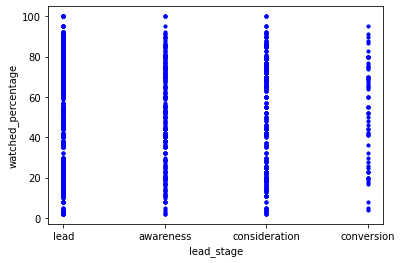

In [20]:
df_merged_interaction_demo.plot.scatter(x = 'lead_stage', y = 'watched_percentage', s=10, c='blue')

#### Leads having watch percentage in the range of (mean [+/-] std) showed a higher involvement at all stages, more importantly at "consideration" and "conversion" stage

<AxesSubplot:xlabel='language', ylabel='watched_percentage'>

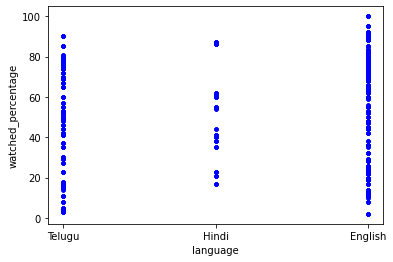

In [21]:
df_merged_interaction_demo.plot.scatter(x = 'language', y = 'watched_percentage', s=10, c='blue')

#### Language seems to play an important role. Number of Leads taking demo in English are more and they tend to have higher watched percentage

In [22]:
leads_reasons_for_no_interest

,lead_id,reasons_for_not_interested_in_demo,reasons_for_not_interested_to_consider,reasons_for_not_interested_to_convert
0,USR1001,No time for student,NaN,NaN
1,USR1003,NaN,No time for student,NaN
2,USR1004,NaN,Wants offline classes,NaN
3,USR1005,NaN,Can't afford,NaN
4,USR1006,NaN,Student not interested in domain,NaN
...,...,...,...,...
289,USR1356,Cannot afford,NaN,NaN
290,USR1357,Cannot afford,NaN,NaN
291,USR1358,Wants offline classes,NaN,NaN
292,USR1359,Will join in final year,NaN,NaN


In [23]:
leads_reasons_for_no_interest.groupby('reasons_for_not_interested_in_demo').size()

reasons_for_not_interested_in_demo
Can't afford                        44
Cannot afford                        4
No time for student                 27
Student not interested in domain    28
Wants offline classes               56
Will join in final year              5
dtype: int64

Text(0.5, 1.0, 'Distribution of Reasons for not interested in demo')

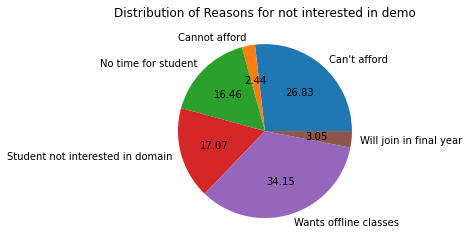

In [24]:
ax = leads_reasons_for_no_interest.groupby('reasons_for_not_interested_in_demo').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Distribution of Reasons for not interested in demo")

Text(0.5, 1.0, 'Distribution of Reasons for not interested to consider')

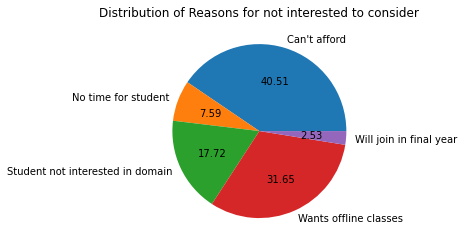

In [25]:
ax = leads_reasons_for_no_interest.groupby('reasons_for_not_interested_to_consider').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Distribution of Reasons for not interested to consider")

Text(0.5, 1.0, 'Distribution of Reasons for not interested to convert')

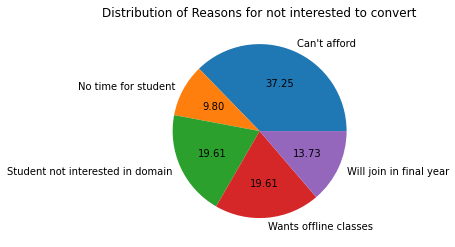

In [26]:
ax = leads_reasons_for_no_interest.groupby('reasons_for_not_interested_to_convert').size().plot(kind='pie', autopct='%.2f',  y='lead_id', ylabel='')
ax.set_title("Distribution of Reasons for not interested to convert")

#### At first glance, the most common reason for leads dropping out at different stages seem to be the affordability of the course. The other crucial reason to look out for is the preference for offline classes.
The problem of affordability can be broadly analysed on two metrics - current_education and parent_occupation.

In [27]:
df_merged_leads_reason = pd.merge(leads_reasons_for_no_interest, lead_basic_details_cleaned, how='inner', on = 'lead_id')


In [28]:
df_merged_leads_reason.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 0 to 291
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 292 non-null    object
 1   reasons_for_not_interested_in_demo      163 non-null    object
 2   reasons_for_not_interested_to_consider  78 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
 4   age                                     292 non-null    int64 
 5   gender                                  292 non-null    object
 6   current_city                            292 non-null    object
 7   current_education                       292 non-null    object
 8   parent_occupation                       292 non-null    object
 9   lead_gen_source                         292 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.1+ KB


In [29]:
df_merged_leads_reason.query('reasons_for_not_interested_in_demo == ["Can\'t afford", "Cannot afford"]')['current_education'].value_counts()

Looking for Job    26
B.Tech             16
Degree              3
Intermediate        2
10th Completed      1
Name: current_education, dtype: int64

In [30]:
df_merged_leads_reason.query('reasons_for_not_interested_to_consider == ["Can\'t afford", "Cannot afford"]')['current_education'].value_counts()

Looking for Job    16
Degree              6
Intermediate        4
B.Tech              3
10th Completed      2
Name: current_education, dtype: int64

In [31]:
df_merged_leads_reason.query('reasons_for_not_interested_to_convert == ["Can\'t afford", "Cannot afford"]')['current_education'].value_counts()

Looking for Job    11
B.Tech              7
Degree              1
Name: current_education, dtype: int64

#### Most of the leads dropping out due to affordability reasons are either "Looking for job" or pursuing "B.Tech" or "Degree". In such cases, parents income might play a major role.



In [32]:
df_merged_leads_reason.query('reasons_for_not_interested_in_demo == ["Can\'t afford", "Cannot afford"]')['parent_occupation'].value_counts()

Government Employee    17
Business               11
IT Employee             9
Lawyer                  8
Private Employee        2
Doctor                  1
Name: parent_occupation, dtype: int64

In [34]:
df_merged_leads_reason.query('reasons_for_not_interested_to_consider == ["Can\'t afford", "Cannot afford"]')['parent_occupation'].value_counts()

Government Employee    17
Business                6
IT Employee             4
Lawyer                  4
Name: parent_occupation, dtype: int64

In [35]:
df_merged_leads_reason.query('reasons_for_not_interested_to_convert == ["Can\'t afford", "Cannot afford"]')['parent_occupation'].value_counts()

Business               6
IT Employee            6
Government Employee    4
Lawyer                 2
Private Employee       1
Name: parent_occupation, dtype: int64

#### Most of the leads who dropped out at various stages due to affordability have parents working as a government employee or an IT employee or in business

In [36]:
leads_interaction_details.lead_id.nunique()

358

In [37]:
leads_interaction_details.query('call_reason == "successful_conversion"')['lead_id'].nunique()

64

#### Approximately 6% of the leads got converted successfully.